<a href="https://colab.research.google.com/github/ani98622/NLP-assignments/blob/main/assg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment - 01
#### Team Members :
- Aniket Tiwari - MDS202308<br>
- Bibek Paul - MDS202317<br>

### Task - 01

In [1]:
import pandas as pd
import numpy as np

from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

- Data split

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train: X = ', X_train.shape)
print('Test: X = ', X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [3]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((10000, 28, 28), (10000,), (60000, 28, 28), (60000,))

- Applying on the y_train, y_test

In [4]:
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

In [5]:
dict_val = {
    'shoes': 0,
    'clothes': 1,
    'others': 2
}

In [6]:
change = {9: 'shoes', 0: 'clothes', 3: 'clothes', 2: 'clothes', 7: 'clothes', 5: 'shoes', 1: 'clothes', 6: 'clothes', 4: 'clothes', 8: 'others'}

for k, v in change.items():
    y_test.replace(k, v, inplace=True)
    y_train.replace(k, v, inplace=True)

In [7]:
y_test.unique(), y_train.unique()

(array(['shoes', 'clothes', 'others'], dtype=object),
 array(['shoes', 'clothes', 'others'], dtype=object))

In [8]:
dict_val = {
    'shoes': 0,
    'clothes': 1,
    'others': 2
}

y_test = y_test.map(dict_val)
y_train = y_train.map(dict_val)

In [9]:
y_test.unique(), y_train.unique()

(array([0, 1, 2]), array([0, 1, 2]))

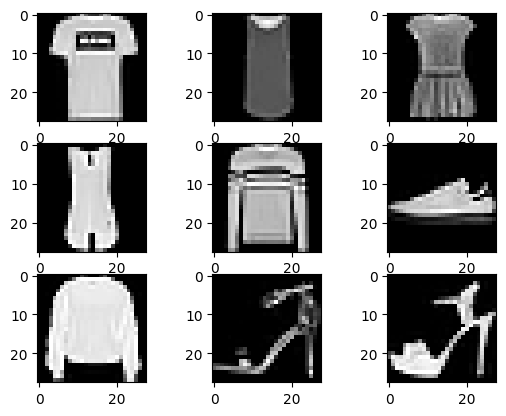

In [10]:
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

- Model Training

-
We will create a basic CNN architecture from scratch to classify the images. We will be using 3 convolution layers along with 3 max-pooling layers. At last, we will add a softmax layer of 10 nodes as we have 10 labels to be identified.

In [11]:
def model_arch():
  models = Sequential()
  models.add(Conv2D(64,(5,5),padding='same',activation = 'relu',input_shape =(28,28,1)))
  models.add(MaxPooling2D(pool_size=(2,2)))

  models.add(Conv2D(128,(5,5),padding='same',activation = 'relu'))
  models.add(MaxPooling2D(pool_size=(2,2)))

  models.add(Conv2D(256,(5,5),padding='same',activation = 'relu'))
  models.add(MaxPooling2D(pool_size=(2,2)))

  models.add(Flatten())
  models.add(Dense(256,activation = 'relu'))
  models.add(Dense(3,activation = 'softmax'))

  return models

In [12]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,899 (6.17 MB)

 Trainable params: 1,616,899 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

- Model Training

In [61]:
history = model.fit(
    X_train.astype(np.float32), y_train.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - loss: 16.1217 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.0659 - val_sparse_categorical_accuracy: 0.9766
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0659 - val_sparse_categorical_accuracy: 0.9766
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0464 - val_sparse_categorical_accuracy: 0.9838
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0464 - val_sparse_categorical_accuracy: 0.9838
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9899 - val_loss: 0.0365 - val_sparse_categorical_accuracy: 0.9873
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0365 - val_sparse_categorical_accuracy: 0.9873
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0373 - val_sparse_categorical_ac

In [62]:
model.save_weights('./model.weights.h5', overwrite=True)

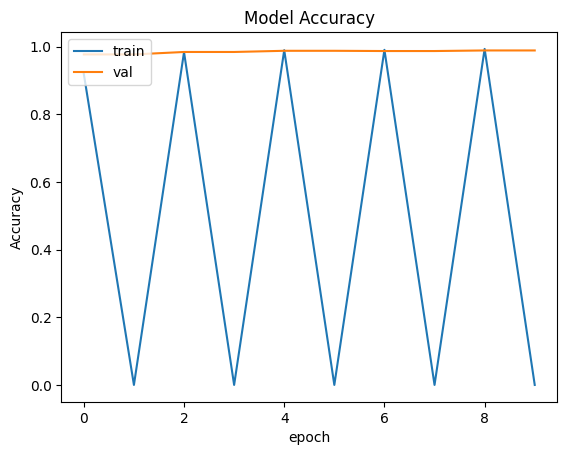

In [63]:
# Accuracy vs Epoch plot

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

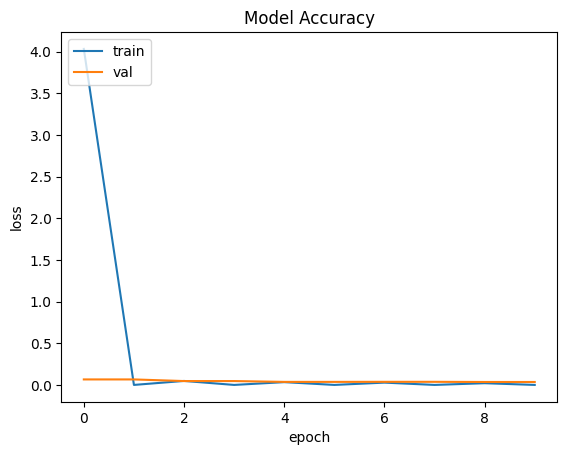

In [64]:
# Loss vs Epoch plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
shoes


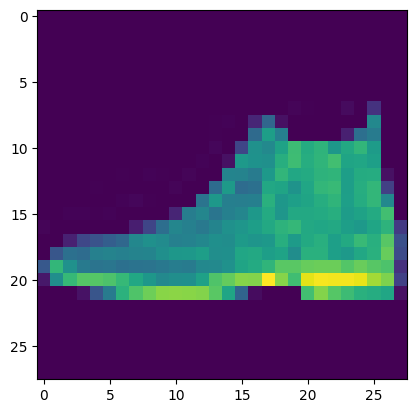

In [67]:
labels = {
    0: 'shoes',
    1: 'clothes',
    2: 'others'
}

predictions = model.predict(X_test[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(X_test[:1][0])
plt.show()

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [91]:
labels = {
    0: 'shoes',
    1: 'clothes',
    2: 'others'
}

predictions = model.predict(X_test)
y_pred = [np.argmax(val) for val in predictions]

acc_scr = accuracy_score(np.array(y_test), y_pred)

print(acc_scr)
print(classification_report(np.array(y_test), y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.9874
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2000
           1       0.99      0.99      0.99      7000
           2       0.97      0.99      0.98      1000

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.98     10000
weighted avg       0.99      0.99      0.99     10000



- Shuffle Effect

In [13]:
train_images_flat = X_train.reshape(X_train.shape[0], -1)
test_images_flat = X_test.reshape(X_test.shape[0], -1)

permutation = np.random.permutation(train_images_flat.shape[1])

train_images_shuffled = train_images_flat[:, permutation]
test_images_shuffled = test_images_flat[:, permutation]

X_train_shuff = train_images_shuffled.reshape(X_train.shape[0], 28, 28)
X_test_shuff = test_images_shuffled.reshape(X_test.shape[0], 28, 28)

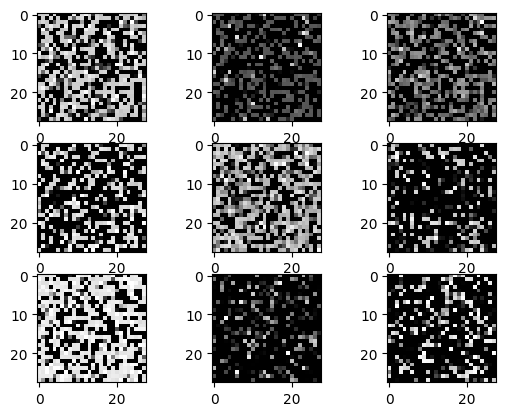

In [24]:
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_train_shuff[i], cmap=plt.get_cmap('gray'))

plt.show()

In [14]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,899 (6.17 MB)

 Trainable params: 1,616,899 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train_shuff.astype(np.float32), y_train.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 22.0369 - sparse_categorical_accuracy: 0.7404 - val_loss: 0.1234 - val_sparse_categorical_accuracy: 0.9564
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.1234 - val_sparse_categorical_accuracy: 0.9564
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.0937 - val_sparse_categorical_accuracy: 0.9690
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0937 - val_sparse_categorical_accuracy: 0.9690
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0821 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9716
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9716
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0883 - val_sparse_categorical_a

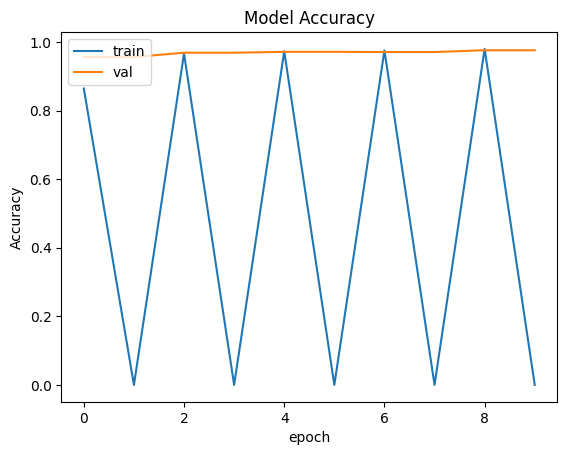

In [16]:

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

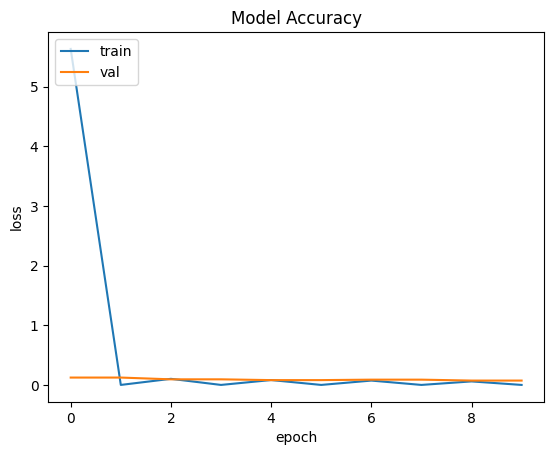

In [17]:
# Loss vs Epoch plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
predictions = model.predict(X_test_shuff)
y_pred = [np.argmax(val) for val in predictions]

acc_scr = accuracy_score(np.array(y_test), y_pred)

print(acc_scr)
print(classification_report(np.array(y_test), y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.9766
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2000
           1       0.98      0.98      0.98      7000
           2       0.95      0.96      0.96      1000

    accuracy                           0.98     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



- Performance Decreased from 98.74% to 97.66%

### Task - 02

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Unzipping Data

In [6]:
# %%capture
# !unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive/EmotionData

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

- (A) - Using built in architecture of ResNET-18




In [7]:
resnet18 = models.resnet18(pretrained=False)

In [8]:
# Modify the fully connected layer to match the number of classes in your dataset
num_classes = 7
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

In [9]:
# Move the model to the GPU if available
resnet18 = resnet18.to(device)

In [10]:
# Define transformations (Resize, Normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

In [13]:
import os
print(os.listdir('/content/drive/MyDrive/EmotionData/train'))


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [14]:
for folder in os.listdir('/content/drive/MyDrive/EmotionData/train'):
    print(f'{folder}: {os.listdir(f"/content/drive/MyDrive/EmotionData/train/{folder}")}')


angry: ['im3031.png', 'im3703.png', 'im2365.png', 'im2569.png', 'im2531.png', 'im513.png', 'im3457.png', 'im3328.png', 'im3427.png', 'im890.png', 'im3085.png', 'im3749.png', 'im2392.png', 'im2739.png', 'im675.png', 'im2845.png', 'im2572.png', 'im2597.png', 'im245.png', 'im3853.png', 'im3870.png', 'im3184.png', 'im3945.png', 'im3973.png', 'im2607.png', 'im3803.png', 'im2586.png', 'im314.png', 'im2743.png', 'im3844.png', 'im2770.png', 'im2837.png', 'im3187.png', 'im2790.png', 'im2798.png', 'im3918.png', 'im425.png', 'im3331.png', 'im3678.png', 'im2409.png', 'im2350.png', 'im3565.png', 'im3613.png', 'im2525.png', 'im665.png', 'im3267.png', 'im3760.png', 'im3537.png', 'im3079.png', 'im3189.png', 'im3229.png', 'im350.png', 'im3840.png', 'im609.png', 'im90.png', 'im3600.png', 'im776.png', 'im2933.png', 'im2414.png', 'im2707.png', 'im3799.png', 'im745.png', 'im3699.png', 'im2686.png', 'im2371.png', 'im3949.png', 'im3106.png', 'im348.png', 'im833.png', 'im971.png', 'im2577.png', 'im3102.png', 

In [24]:
import os

# Check the train directory
print("Train Directory Contents:")
for folder in os.listdir('/content/drive/MyDrive/EmotionData/train/'):
    print(f'{folder}: {os.listdir(f"/content/drive/MyDrive/EmotionData/train/{folder}")}')

# Check the test directory
print("\nTest Directory Contents:")
for folder in os.listdir('/content/drive/MyDrive/EmotionData/test/'):
    print(f'{folder}: {os.listdir(f"/content/drive/MyDrive/EmotionData/test/{folder}")}')


Train Directory Contents:
angry: ['im3031.png', 'im3703.png', 'im2365.png', 'im2569.png', 'im2531.png', 'im513.png', 'im3457.png', 'im3328.png', 'im3427.png', 'im890.png', 'im3085.png', 'im3749.png', 'im2392.png', 'im2739.png', 'im675.png', 'im2845.png', 'im2572.png', 'im2597.png', 'im245.png', 'im3853.png', 'im3870.png', 'im3184.png', 'im3945.png', 'im3973.png', 'im2607.png', 'im3803.png', 'im2586.png', 'im314.png', 'im2743.png', 'im3844.png', 'im2770.png', 'im2837.png', 'im3187.png', 'im2790.png', 'im2798.png', 'im3918.png', 'im425.png', 'im3331.png', 'im3678.png', 'im2409.png', 'im2350.png', 'im3565.png', 'im3613.png', 'im2525.png', 'im665.png', 'im3267.png', 'im3760.png', 'im3537.png', 'im3079.png', 'im3189.png', 'im3229.png', 'im350.png', 'im3840.png', 'im609.png', 'im90.png', 'im3600.png', 'im776.png', 'im2933.png', 'im2414.png', 'im2707.png', 'im3799.png', 'im745.png', 'im3699.png', 'im2686.png', 'im2371.png', 'im3949.png', 'im3106.png', 'im348.png', 'im833.png', 'im971.png', 'i

In [19]:
from PIL import Image

# Example of checking image files in a directory
def check_image_files(directory):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                with Image.open(file_path) as img:
                    print(f'{file_path} is a valid image.')
            except Exception as e:
                print(f'Error with {file_path}: {e}')

check_image_files('/content/drive/MyDrive/EmotionData/train/')


/content/drive/MyDrive/EmotionData/train/angry/im3031.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3703.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im2365.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im2569.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im2531.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im513.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3457.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3328.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3427.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im890.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3085.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im3749.png is a valid image.
/content/drive/MyDrive/EmotionData/train/angry/im2392.png is a valid image.
/content/drive

KeyboardInterrupt: 

In [22]:
# Load dataset
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/EmotionData/train/', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

FileNotFoundError: Found no valid file for the classes neutral, surprised. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [21]:
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/EmotionData/test/', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.001)

num_epochs = 10

In [ ]:
for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader)}')


    resnet18.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {100 * correct / total}%')

torch.save(resnet18.state_dict(), 'resnet18_scratch.pth')


- Task - (a)